In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.1. Variable Importance Plot/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.1. Variable Importance Plot/Output')
cur_date = "042622"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

#reading in file
var_imp_lung = data.frame(read_excel("042622_noise_Significant_predictors_lung.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(var_imp_lung)

,Predictor,Passed_Filter,MeanDecreaseGini
,<chr>,<chr>,<dbl>
1,Chol,Yes,2.2300354
2,DHL,Yes,0.5071855
3,Zym,Yes,0.4326768
4,IL8,Yes,0.3466893
5,dHLan,Yes,0.3249050
6,IL1a,Yes,0.2858676


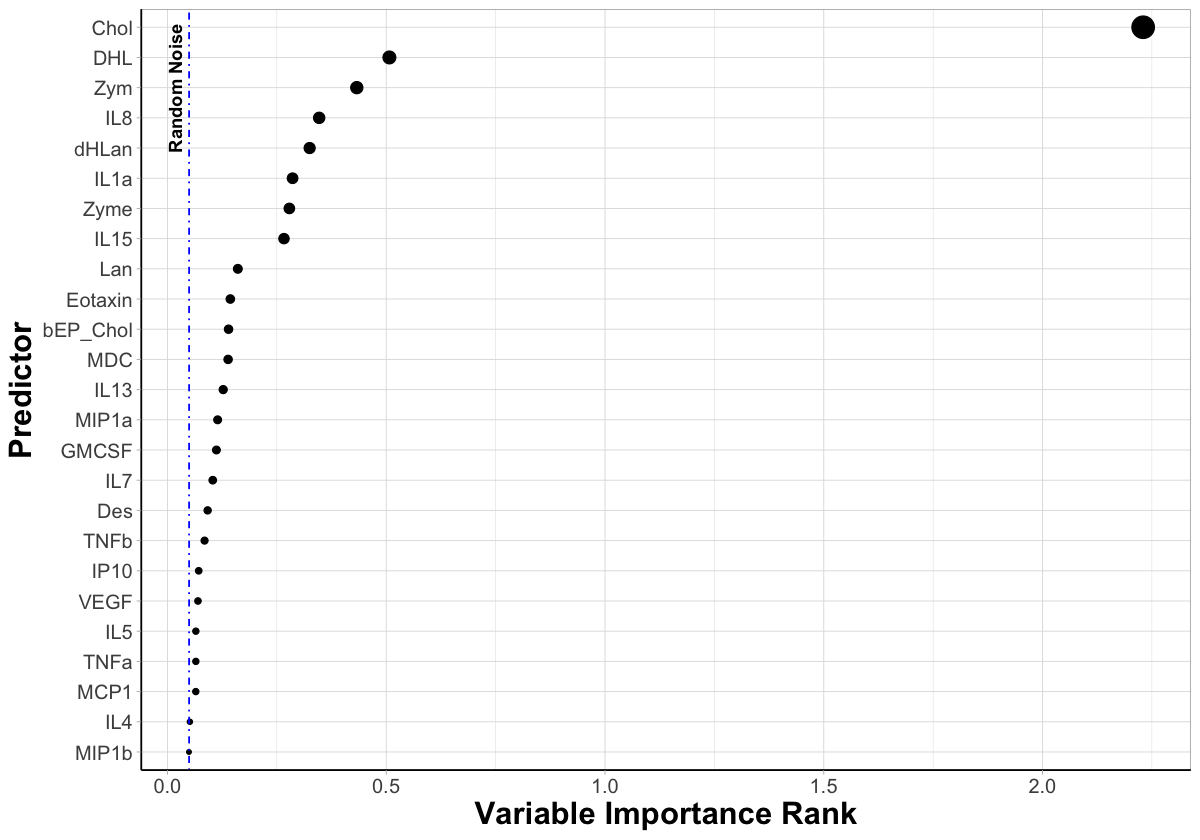

In [13]:
options(repr.plot.width=10, repr.plot.height=7) #changing size

#only plotting features w/ a mean decrease gini > 0.2
Figure2 = ggplot() + 
  geom_point(data = var_imp_lung %>% 
             filter(MeanDecreaseGini > 0.049, !grepl("noise", Predictor)), 
             aes(x = MeanDecreaseGini, y = reorder(Predictor, MeanDecreaseGini), 
                 size = MeanDecreaseGini)) + 
  geom_vline(data = var_imp_lung %>% 
             filter(MeanDecreaseGini > 0.049, grepl("noise", Predictor)),
                    aes(xintercept = MeanDecreaseGini), color = "blue", linetype = "dotdash") +

  #adding text to verticle background noise lines
  geom_text(data = var_imp_lung %>% 
             filter(MeanDecreaseGini > 0.049, grepl("noise", Predictor)),
            aes(x = MeanDecreaseGini, label = "Random Noise\n", y = 23), angle = 90, fontface = "bold") +

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance Rank', y = 'Predictor') + #changing axis labels 
  
  #this removes response variable from y axes
  scale_y_reordered() +
  #removing size legend
  guides(size = "none")

Figure2

In [4]:
#exporting figure
ggsave(Figure2, 
       filename = 'Figure2.pdf',
       path = Output,
       width = 10, height = 7)